<a href="https://colab.research.google.com/github/AlienDev1/Data-Science-Life-cycle-in-Launch-Business-Analytics/blob/master/Aerospace_Launch_Business_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In oder to use personal google drive as a directory for files, it will have to be mounted to the colab notebook.
# Only individuals that will be working with the code will have to do this, otherwise it will not be necessary.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AF4NB_j-T4gxDKxXu9YQi82EbXzwF1EKXZDO3nxd_PHnPiiY-oRgUI
Mounted at /content/drive


\

# Aerospace Launch Business Data Analysis

# Abstract

The exponential advance not only of computational power but also the rapid spread of internet has given independent research groups and personal researchers massive amounts of data previously only available to whomever is able to afford data warehouses. The aforementioned push towards data has created another S.T.E.M. (Science Technology Engineering Mathematics) field that is very much a hot topic in the Tech world. This field is known as Data Science. Data Science, as a profession is a hybrid of software engineering/computer science, statistics, and mathematical modelling. Software knowledge enables researchers to benefit from coding in languages other than de-facto MATLAB to extract and manipulate data from various sources. Once the data is acquired, data analysis and statistical insight is needed to get an intuition of the various trends in the dataset using methods such as resampling methods. Then Machine learning models, such as neural networks which evolved out of various statistical approaches such as Bayesian theorem and Markov chains, can be created for forecasting. Regression-based mathematical models such as Principle Component Analysis (PCA), Least Means Square Error (LMSE) are quite popular in Business Intelligence today for time-series data. This research will be an explorative study with the aim of providing a variety of tools and techniques that are part of the Data Science lifecycle that can prove to be give a massive advantage to researchers in the Aerospace Industry. This lifecycle will be used to study global launch business and applied to various datasets found online.

# Introduction

NSBE's Aerospace Special Interest Group, East African Spaceport Feasibility study Team is conducting a study with the purpose defined as to "Investigate the feasibility of a spaceport in the East African Community (EAC) that could provide low cost, reliable access to space while stimulating African economic and technology advancement [1]." The purpose of the aformentioned research is rather clear, however, will eventually require various sources of information to prove the "low cost", "reliability" and other aspects of what would make a spaceport the perfect launchsite for whichever target orbit or applications. One would first be interested in investigating current global launch business and gain insight into the potential cost reduction and potential improvements.

# Extract Transform Load (ETL)

The Data Science Lifecycle typically starts with Extract, read the data, often from multiple sources; Transform, clearn and structure the data in the desired form;Load, write the data into a database for storage. As defined by Microsoft Azure documentation: "Extract, transform, and load (ETL) is a data pipeline used to collect data from various sources, transform the data according to business rules, and load it inot a destination data store.[2]" This launch business data analysis will be using data from Wikipedia's list of rocket launch sites [3], UCS (Union for Concerned Scientists) [4], SpaceX's API [5], and Jonathan McDowell's Launch Log [6] can be used in the writing of a Launch Business case report. 

# Data Source - List of Rocket Launch Sites (Wiki)

## Dependecies and Pre-Preprocessing (CSV Module)

In this section the preprocessing of the dataset will be done using user defined python functions created using the csv (comma separated values) module to parse the data, the numpy library for the data to be structured as arrarys, and finally create graphs using matplotlib. Some comments will be made regarding the advantages and distanvatages of this methodology.

In [ ]:
ls

'Aerospace Launch Business Analytics Lifecycle.docx'   Data/
'Aerospace Launch Business Data Analysis'


In [ ]:
import csv
import numpy as np

In [ ]:
### Creating a function using CSV Module

def create_input_matrix(input_file):
    # Open the input_file in read mode and output_file in write mode
    with open(input_file, 'r', encoding = "ISO-8859-1") as read_obj:
        # Create a csv.reader object from the input file object
        csv_reader = csv.reader(read_obj)
        headers = next(csv_reader)
        inputs = np.array(list(csv_reader))
    return headers, inputs

Launch_Sites_Wiki_csv = 'Data/Launch Sites-Wiki.csv'

In [ ]:
# Function Call to create the matrix from the input data
Launch_Sites = create_input_matrix(Launch_Sites_Wiki_csv)

When using the csv module, We are expecting the data to come in as a list of lists. First things first, let's look at the

In [ ]:
Launch_Sites_headers = Launch_Sites[0]
Launch_Sites_data = Launch_Sites[1]
print(Launch_Sites_headers)
print(Launch_Sites_data.shape)

['Continent', 'Country', 'Location', 'Latitude', 'Longitute', 'Year Opened', 'Year Closed', 'Number of rocket launches', 'Heaviest rocket launched', 'Highest achieved Orbit']
(110, 10)


When using the csv module, We are expecting the data to come in as a list of lists. First things first, let's look at the 

In [ ]:
# Here we can get all the continents that are part of this dataset by slicing
Continents = Launch_Sites_data[:, 0:1]
print(type(Continents))
# Since we are pulling values from an ndarray, the initial Continents_List will be
# a list of lists - a column list or 1 x n vector
Continents_List = Continents.tolist()

<class 'numpy.ndarray'>


In [ ]:
# Printing the unique values from the the continents list
print(len(Continents_List))
np.unique(Continents_List)

110


array(['', 'Africa', 'Asia', 'Europe', 'North America', 'Ocenia',
       'South America'], dtype='<U13')

In [ ]:
# Converting the 1 x n vector into a n x 1
Continents_List = list(np.concatenate(Continents_List).flat)
print(len(Continents_List))

110


In [ ]:
Continents_Counts = []
Continents_Counts.append(Continents_List.count('Africa'))
Continents_Counts.append(Continents_List.count('Asia'))
Continents_Counts.append(Continents_List.count('Europe'))
Continents_Counts.append(Continents_List.count('North America'))
Continents_Counts.append(Continents_List.count('Ocenia'))
Continents_Counts.append(Continents_List.count('South America'))
print(Continents_Counts)

[8, 38, 26, 16, 5, 16]


## Launch Sites - Continent Analysis

### Bar

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = [width, height]
plt.rcParams['figure.figsize'] = [20, 10]

In [ ]:
x_axis = np.arange(len(Continents_Counts))
print(x_axis)

[0 1 2 3 4 5]


<BarContainer object of 6 artists>

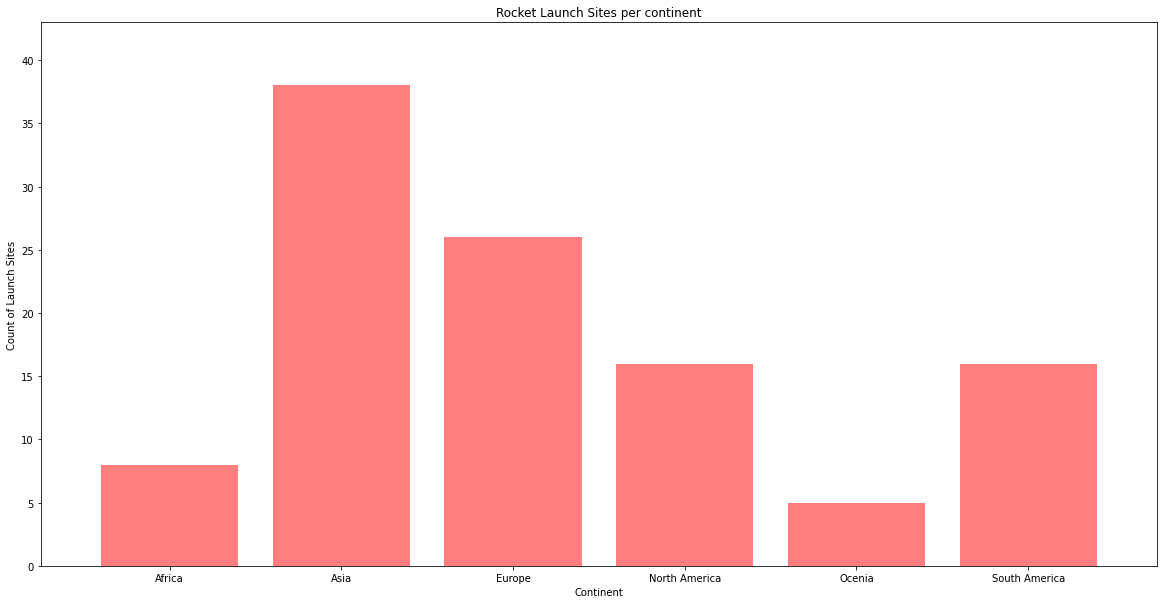

In [ ]:
# Telling Matplotlib where we would like to place each of our x-axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Africa", "Asia", "Europe","North America","Ocenia","South America"])
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Continents_Counts)+5)
# Labels and a title
plt.title("Rocket Launch Sites per continent")
plt.xlabel("Continent")
plt.ylabel("Count of Launch Sites")
plt.bar(x_axis, Continents_Counts, color='r', alpha=0.5, align="center")

### Pie Chart

([<matplotlib.patches.Wedge at 0x7f8370f7df28>,
 [Text(-1.0712069183896158, 0.5408472409046967, 'Africa'),
  Text(-0.7191359693904338, -0.8323721869025186, 'Asia'),
  Text(1.4484641278891088, -0.6796702658042673, 'Europe'),
  Text(0.7883315511512979, 0.7671592829780454, 'North America'),
  Text(0.21179158092715245, 1.0794185130191059, 'Ocenia'),
  Text(-0.43999639139884844, 1.0081682278052564, 'South America')],
 [Text(-0.6248707023939426, 0.315494223861073, '7.3%'),
  Text(-0.3922559833038729, -0.4540211928559192, '34.9%'),
  Text(0.9958190879237623, -0.46727330774043374, '23.9%'),
  Text(0.42999902790070793, 0.4184505179880247, '14.7%'),
  Text(0.1155226805057195, 0.5887737343740577, '4.6%'),
  Text(-0.23999803167209913, 0.5499099424392307, '14.7%')])

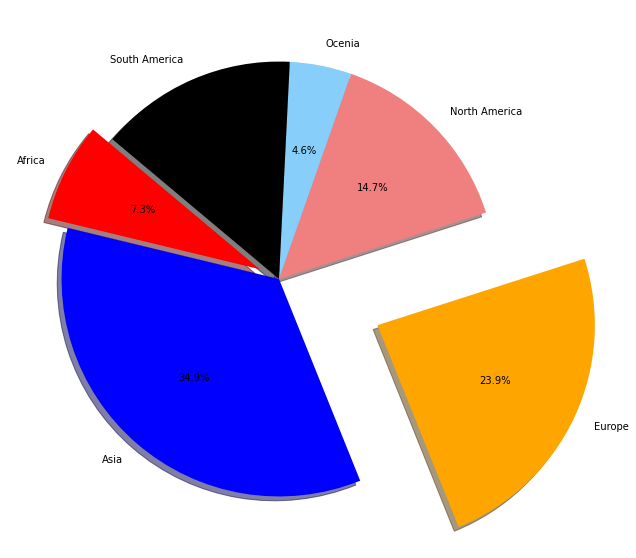

In [ ]:
# Tells matplotlib to seperate the "Python" section from the others
labels = ["Africa","Asia","Europe","North America","Ocenia","South America"]
colors = ["red","blue","orange","lightcoral","lightskyblue","black"]
explode = (0.1, 0, 0.5, 0, 0, 0)
plt.pie(Continents_Counts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Launch Sites -  Countries 

In [ ]:
# Directly reading the countries Column into a list
Countries = list(Launch_Sites_data[:,1])
# Checking how many values aer in the list of countries
print(len(Countries))
# Printing the unique values from the the countries list
unique_countries = np.unique(Countries)
print(len(unique_countries))
print(type(unique_countries))


110
44
<class 'numpy.ndarray'>


In [ ]:
# Counting how many launch site each unique country has
countries_counts = []
for country in unique_countries:
    countries_counts.append(Countries.count(country))
print(countries_counts)

[1, 2, 9, 3, 3, 3, 6, 1, 1, 1, 1, 5, 1, 1, 1, 4, 1, 3, 1, 1, 1, 6, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 2, 4, 9, 1, 1, 1, 4, 1, 2, 12]


### Countries with at least 2 Spaceports

In [ ]:
# Since we can see from the above list that most coutries have only one
# We can only plot those who at least have two launchsites
countries_counts_2 = []
for country in unique_countries:
    if Countries.count(country) >= 2:
        countries_counts_2.append(Countries.count(country))
    else:
        continue
print(countries_counts_2)

[2, 9, 3, 3, 3, 6, 5, 4, 3, 6, 2, 2, 3, 2, 2, 4, 9, 4, 2, 12]


### Countries with at least 3 Spaceports

In [ ]:
# We can further decrease the sample size to only countries with at least 3
# Launch sites
# Creating a separate list to store the country names
countries_counts_3 = []
countries_names_3 = []
for country in unique_countries:
    if Countries.count(country) >= 3:
        countries_counts_3.append(Countries.count(country))
        countries_names_3.append(country)
    else:
        continue
print(len(countries_counts_3))
print(len(countries_names_3))

14
14


([<matplotlib.patches.Wedge at 0x7f8370ee6ba8>,
 [Text(-1.140566111119611, 0.3729731172155539, 'Argentina'),
  Text(-1.0794917973577134, -0.2114177368089385, 'Australia'),
  Text(-0.9913871522110822, -0.47660414856650246, 'Brazil'),
  Text(-0.8393042290539078, -0.7110333403520721, 'Canada'),
  Text(-0.5136678144488953, -0.972700044412097, 'China'),
  Text(-0.02075409440172157, -1.0998041951027304, 'Germany'),
  Text(0.3908116164381424, -1.0282345454501158, 'India'),
  Text(0.6747715549348964, -0.8687251283638238, 'Iran'),
  Text(0.9500229038059191, -0.554487585293097, 'Japan'),
  Text(1.0882601134094876, -0.1602807710299946, 'Norway'),
  Text(1.0874919790026667, 0.16541219908115484, 'Poland'),
  Text(0.8393042789827153, 0.7110332814160703, 'Russia'),
  Text(0.34189210976673573, 1.0455189071840119, 'Sweden'),
  Text(-0.39081158033679214, 1.0282345591715245, 'United States')],
 [Text(-0.6653302314864397, 0.21756765170907305, '12.2%'),
  Text(-0.5888137076496618, -0.11531876553214826, '4.

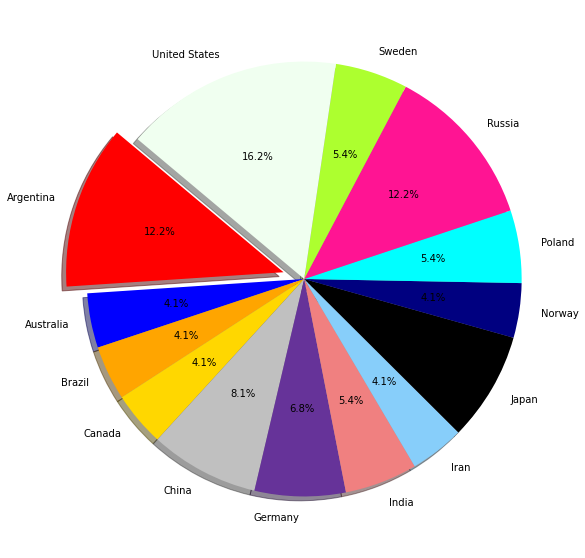

In [ ]:
# Tells matplotlib to seperate the "Python" section from the others
labels = countries_names_3
colors = ["red","blue","orange","gold","silver","rebeccapurple",
          "lightcoral","lightskyblue","black","navy","cyan",
          "deeppink","greenyellow","honeydew"]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(countries_counts_3, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Interactive Map

The interactive map below was created from latitude and longitude values using the Tableau Public software obtained from Wikipedia's list of Rocket Launch Sites page [4]. This is a simple bubble heat map that has the geographic locations of all the launch sites in the world and the which had the most Rocket Launches. If you hover over individual bubbles you can see a field for the year that individual Launch site and a total number of rocket launch sites. During the business case study, the team can do further research on the cost of operabilition for each location and find out the reasons for some of them closing or still operating. Conclusions made will either make a case for or against Spaceport at an Equatorial location. For example, if we look at Spaceports in the Western Hemisphere, the White Sands Missile Range in New Mexico has over 7000 rocket launches to date but it's latitudinal location is at 32 degrees. On the other hand, the Guiana Space center with a latitudinal location of 5.2 only has 200 launches. Why is there such a huge difference in the two ? Maybe specific rockets for specific target orbits are being launched from one location compared to another ? Also if we take a look at the Peenemünde/Greifswalder Oie (54 degrees latitude), was launched from 3000 times. How is this number so high for a Spaceport so far from the Equator ?   Intuitively, one can also ask why it closed in 1945 while being used so frequently at such a early time in Spaceflight ? Was the reason it close an economic factor or other ? Keeping such questions in mind should help in the aid in the formation of further analysis.

Link: [Launch Site Analysis](https://public.tableau.com/profile/gael.gatera#!/vizhome/LaunchSiteAnalysis/Sheet1)

# Data Source - Union For Concerned Scientists

This is an in-depth databse built by experts at UCS detailing the over 2,218 satellites currently orbiting Earth, including their country of origin, purpose, and other operational details. It is available as a downloadable Excel file, which is updated roughly quarterly. The databse will be used to collect open-source information on the operational specific satellites, their launch sites and other information that will be discussed in the sections below.


## Dependencies & Pre-Processing

In [ ]:
# Install the gspread library to access google spreadsheets in colab
!pip install --upgrade --quiet gspread

In [ ]:
import pandas as pd

In [ ]:
# Making sure you are in the correct directory
%cd ..

/content/drive/My Drive/Data Science Lifecycle in the Aerospace Industry


In [ ]:
ls

'Aerospace Launch Business Data Analysis'   Data/


In [ ]:
# Listing the files in your directory to make sure what you need is there
ls

UCS-Satellite-Database-10-1-Cleaned.xlsx


The database is downloaded as an excel workbook but had to be converted to a Pandas dataframe which is is a 2-dimensional labeled data structure with columns of potentially different types. Dataframes are great ways to perform operations on rows and columns and is widely used in Data Science statistical analysis of all sorts. We will use the Pandas library to create our dataframe and perform queries for the data that we need.

In [ ]:
# Reading in Database from Union of Concerned Scientist for Analysis
UCS_df = pd.read_excel(r'Data/UCS-Satellite-Database-10-1-Cleaned.xlsx')

In [ ]:
# Looking at the first five rows to get an understanding of the kind of data we will be working with.
UCS_df.head()

,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data
0,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,476,500,0.001750,97.40,95.00,4.0,NaN,NaN,2018-11-29,NaN,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.,Estimated
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,NaN,LEO,NaN,0.0,497,517,0.001454,97.45,94.70,4.5,NaN,4.5,2017-06-23,2.0,University of Aalto,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,JMSatcat/10_17
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,442,687,0.017665,98.20,95.90,1.0,NaN,NaN,2016-04-25,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460,Carries AIS system.,Space50
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,35778,35793,0.000178,0.08,1436.03,6330.0,NaN,16000,2014-02-06,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",ZARYA
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,35700,35700,0.000000,0.00,1436.10,1800.0,NaN,NaN,2016-06-15,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588,NaN,Estimated


## Max Launch Mass Analysis

In [ ]:
# Quick statistical description of numerical values.

UCS_df.describe()

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.),NORAD Number
count,2216.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2051.000000,1141.000000,2218.000000
mean,5.643100,10728.768711,12183.392696,0.016083,60.509225,508.050406,1504.130804,9.969544,39015.945897
std,47.689443,15347.973916,20388.299337,0.098612,40.543308,713.712788,2138.592316,4.979366,5806.790874
min,-179.800000,200.000000,300.000000,0.000000,0.000000,90.520000,1.000000,0.250000,7530.000000
25%,0.000000,500.000000,541.500000,0.000289,6.120000,95.200000,6.000000,5.000000,37234.750000
50%,0.000000,634.500000,703.000000,0.000903,74.050000,98.000000,447.000000,10.000000,41182.500000
75%,0.000000,35314.250000,35786.000000,0.001454,97.500000,1434.865000,2497.500000,15.000000,43221.500000
max,328.500000,62200.000000,330000.000000,0.957119,143.400000,11520.000000,18000.000000,30.000000,53160.000000


Since this is a statistical description of the whole database, their values might not be of much significance at all. However, if we look at the max value for Launch Mass, we can see that the mass of the highest vehicle launched had a mass of 18,000 Kilograms. So it would be interest to know what that vehicle was, where it was launch from and other information that could be used in our study.

In [ ]:
grouped = UCS_df.groupby(['Launch Mass (kg.)', 'Name of Satellite, Alternate Names'])

In [ ]:
grouped.last()

Country/Org of UN Registry  ... Source Used for Orbital Data
Launch Mass (kg.) Name of Satellite, Alternate Names                                             ...                             
1.0               AAUSat-4                                                              Denmark  ...                      Space50
                  Beesat-9 (Tubsat-17)                                                  Germany  ...               JMSatcat/11_19
                  BisonSat (Nwist Qwiqway)                                                   NR  ...                     JM/12_15
                  Duchifat-1                                                                 NR  ...                          NaN
                  Exoconnect (D-Star One)                                            NR (11/19)  ...               JMSatcat/11_19
...                                                                                         ...  ...                          ...
14500.0           Lacrosse/Onyx 5 (Lacrosse-5, NROL 16, USA 182)                            USA  ...                    SC - ASCR
18000.0           Keyhole 5 (Advanced KH-11, KH-12-5, Improved Cr...                        USA  ...                         JMSR
                  Keyhole 6 (NRO L49, Advanced KH-11, KH-12-6, Im...                        USA  ...               JMSatcat/2_USA
                  Keyhole 7 (NRO L65, Advanced KH-11, Improved Cr...                        USA  ...                        ZARYA
                  Keyhole 8 (NRO L71, Advanced KH-11, Improved Cr...                 NR (11/19)  ...                JMSatcat/3_19

[2046 rows x 26 columns]

In the above results we can see that a total of four satellites had a Launch Mass of 18000 kilograms and had similar characteristics. All four were Military Satellites Launched by the United States, all found were Earth Obvservation Satellites, all four were Launched to Lower Earth Orbit, so on and so on. So this means that as we progress in our feasiblity study we can make a case for Military Vehicles as the number one source of potential revenue since they tend to launch heavier vehicles and would benefit the most from the cost savings associated with launching from an Equatorial location. Again, this is simply an example of the versatility that using Python and associated libraries for analytical purposes can help us out.

## Frequently used Launch Sites

In order to compare our theoretical spaceport to others, I would be interesting to see which are the most frequently used launch sites in the database that we loaded in and see their geographic locations in the map that we generated above.

In [ ]:
# Doing a value count of all Launch sites 
UCS_df['Launch Site'].value_counts()

Satish Dhawan Space Centre              311
Cape Canaveral                          311
Baikonur Cosmodrome                     294
Guiana Space Center                     273
Vandenberg AFB                          245
Jiuquan Satellite Launch Center         140
Plesetsk Cosmodrome                     107
Xichang Satellite Launch Center         106
Taiyuan Launch Center                    86
Vostochny Cosmodrome                     64
Dombarovsky Air Base                     57
Tanegashima Space Center                 43
International Space Station              33
Rocket Lab Launch Complex 1              32
Sea Launch Odyssey                       28
Wallops Island Flight Facility           27
International Space Station - Cygnus     12
Uchinoura Space Center                   10
Orbital ATK L-1011                        8
Cygnus                                    8
Yellow Sea Launch Platform                7
Palmachim Launch Complex                  5
Kodiak Launch Complex           

We see that within the top five most used Launch pads there is one that has a position of 45 degree latitude (Baikonur Cosmodrome) in Kazakhstan used by the Russians. So this would be a case against our equatorial launch site. In thing to ask ourselves is which satelittes did they launching from the mentioned location which Launch Masses, what were the target orbits, so on and so on. More in depth analysis can be made which would answer those questions.

## Frequent Users and Country of Origin
Other points can be made about the most frequent users of Satellites according to the data gathered in this database. In the below query we can see that commercial vehicles are commercial satellites are an overwhelming majority with 1033 satellites. Futher analysis can be made to know which are the heaviest vehicles and where they were launched from to make a case for a potential cost savings for using the East African Spaceport as a solution.

In [ ]:
#Grouped by users and counting by countries (this would show which use is more popular in each country)
ucs_date_countries = UCS_df.groupby(["Users"])["Country/Org of UN Registry"].count()
ucs_date_countries

Users
Civil                              151
Civil/Government                     3
Civil/Military                       1
Commercial                        1033
Commercial                           1
Commercial/Government                1
Commercial/Military                  2
Government                         419
Government/Civil                    28
Government/Commercial              112
Government/Commercial/Military       1
Government/Military                  5
Military                           331
Military                             1
Military/Civil                       5
Military/Commercial                 75
Military/Government                 49
Name: Country/Org of UN Registry, dtype: int64

 ## Data Source - Space X API (Application Program Interface)


The SpaceX API is a central location for information of most if not all things related to Space X's missions, rockets and more. Subsequent sections will demonstrate how to extract information from this source. Further explanation of how application program interfaces work is outside the scope of this report but may be searched for individually. 

 #### API Enpoint - Launchpads

The basic url for this API is https://api.spacexdata.com/v3/, however different endpoints can be added to the url depending on the desired information. For example, in our case we will want the Launchpds field to know which launchpads where used by different Space X launch vehicles.


In [ ]:
import requests
import json

In [ ]:
url = "https://api.spacexdata.com/v3/launchpads"
print(requests.get(url))

<Response [200]>


In [ ]:
# This will convert values from the url into json format (key value pairs) so we can use python to do some analysis with !
print(requests.get(url).json())

[{'id': 5, 'name': 'VAFB SLC 3W', 'status': 'retired', 'location': {'name': 'Vandenberg Air Force Base', 'region': 'California', 'latitude': 34.6440904, 'longitude': -120.5931438}, 'vehicles_launched': ['Falcon 1'], 'attempted_launches': 0, 'successful_launches': 0, 'wikipedia': 'https://en.wikipedia.org/wiki/Vandenberg_AFB_Space_Launch_Complex_3', 'details': 'SpaceX original west coast launch pad for Falcon 1. Performed a static fire but was never used for a launch and abandoned due to scheduling conflicts.', 'site_id': 'vafb_slc_3w', 'site_name_long': 'Vandenberg Air Force Base Space Launch Complex 3W'}, {'id': 2, 'name': 'CCAFS SLC 40', 'status': 'active', 'location': {'name': 'Cape Canaveral', 'region': 'Florida', 'latitude': 28.5618571, 'longitude': -80.577366}, 'vehicles_launched': ['Falcon 9'], 'attempted_launches': 52, 'successful_launches': 50, 'wikipedia': 'https://en.wikipedia.org/wiki/Cape_Canaveral_Air_Force_Station_Space_Launch_Complex_40', 'details': 'SpaceX primary Falc

In [ ]:
# This chunk of code will let us know in which form is the original data coming in the form as
response = requests.get(url).json()
type(response)

list

In [ ]:
# pretty print the output of the JSON - json.dumps - converts list to string
print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "attempted_launches": 0,
        "details": "SpaceX original west coast launch pad for Falcon 1. Performed a static fire but was never used for a launch and abandoned due to scheduling conflicts.",
        "id": 5,
        "location": {
            "latitude": 34.6440904,
            "longitude": -120.5931438,
            "name": "Vandenberg Air Force Base",
            "region": "California"
        },
        "name": "VAFB SLC 3W",
        "site_id": "vafb_slc_3w",
        "site_name_long": "Vandenberg Air Force Base Space Launch Complex 3W",
        "status": "retired",
        "successful_launches": 0,
        "vehicles_launched": [
            "Falcon 1"
        ],
        "wikipedia": "https://en.wikipedia.org/wiki/Vandenberg_AFB_Space_Launch_Complex_3"
    },
    {
        "attempted_launches": 52,
        "details": "SpaceX primary Falcon 9 launch pad, where all east coast Falcon 9s launched prior to the AMOS-6 anomaly. Initially used to launch Titan rockets for

In [ ]:
# This piece of code iterations through the list of dictionaies (datatype) to get all the names of the launch pads used by SpaceX.
for i in response:
  if i['name']:
    print(i['name'])

VAFB SLC 3W
CCAFS SLC 40
STLS
Kwajalein Atoll
VAFB SLC 4E
KSC LC 39A


Here we see that Space X has only used 6 different Launch Pads:

1. VAFB SLC 3W - Vandenberg Air Force Base Space Launch Complex 3W
2. CCAFS SLC 40 - Cape Canaveral Air Force Station Space Launch Complex 40
3. STLS - SpaceX South Texas Launch Site
4. Kwajalein Atoll - Kwajalein Atoll Omelek Island
5. VAFB SLC 4E - Vandenberg Air Force Base Space Launch Complex 4E
6. KSC LC 39A - Kennedy Space Center Historic Launch Complex 39A

One thing to note is that the South Texas Launch site is not found in the data scrapped from Wikipedia, therefore hurting the credibility of it as a reliable source of data. A better map with more complete information may be created in later stages of the project.

In [ ]:
# We can also create another request to get information on a specific launchpad
response_ksc_lc39a = requests.get(url + "/ksc_lc_39a").json()
print(json.dumps(response_ksc_lc39a, indent=4, sort_keys=True))

{
    "attempted_launches": 20,
    "details": "NASA historic launch pad that launched most of the Saturn V and Space Shuttle missions. Initially for Falcon Heavy launches, it is now launching all of SpaceX east coast missions due to the damage from the AMOS-6 anomaly. After SLC-40 repairs are complete, it will be upgraded to support Falcon Heavy, a process which will take about two months. In the future it will launch commercial crew missions and the Interplanetary Transport System.",
    "id": 4,
    "location": {
        "latitude": 28.6080585,
        "longitude": -80.6039558,
        "name": "Cape Canaveral",
        "region": "Florida"
    },
    "name": "KSC LC 39A",
    "site_id": "ksc_lc_39a",
    "site_name_long": "Kennedy Space Center Historic Launch Complex 39A",
    "status": "active",
    "successful_launches": 20,
    "vehicles_launched": [
        "Falcon 9",
        "Falcon Heavy"
    ],
    "wikipedia": "https://en.wikipedia.org/wiki/Kennedy_Space_Center_Launch_Comple

In [ ]:
# Specific information within each dictionary can be access as keys
response_ksc_lc39a['details']

'NASA historic launch pad that launched most of the Saturn V and Space Shuttle missions. Initially for Falcon Heavy launches, it is now launching all of SpaceX east coast missions due to the damage from the AMOS-6 anomaly. After SLC-40 repairs are complete, it will be upgraded to support Falcon Heavy, a process which will take about two months. In the future it will launch commercial crew missions and the Interplanetary Transport System.'

### API Endpoint - Rockets
In this section we will access a different endpoint within the SpaceX API to find out more information out rockets that are manufactured by Space X. Here we will do separate queries for the Falcon 9 rocket.

In [ ]:
# Performing a GET Request and saving the 
# API's response within a variable
url = "https://api.spacexdata.com/v2/rockets/falcon9"
response = requests.get(url)
response_json = response.json()
type(response_json)

print(json.dumps(response_json, indent=4, sort_keys=True))

NameError: ignored

In [ ]:
# Here we are grabbing a specific value from the dictionary. An interesting fact to know is the average cost per launch of the Falcon 9 in general.
print(response_json["cost_per_launch"])

50000000


Interesting fact to note for the future analysis and data gathered either from this source others.

In [ ]:
# Here we can take a look at the number of payloads that the falcon 9 can carry using the only available field 
# relating to payloads....the 'payload weights' key

number_payloads = len(response_json["payload_weights"])
print(f"There are {number_payloads} payloads.")

There are 3 payloads.


In [ ]:
# Referencing the values stored within sub-dictionaries and sub-lists
payload_weight = response_json["payload_weights"][0]["kg"]
print(f"The first payload weighed {payload_weight} Kilograms")

The first payload weighed 22800 Kilograms


# Conlusion

This uninformal proposal was written using Google Colab, a product of Jupyter notebook and Google Drive products to help developers colaborate on projects such as these with efficiency and removing the need to constantly email latest version of code. This is not as in depth as Git products and their version control capabilities enabled by pushes and pulls but for the purpose of simple analysis that will not be needed. Some of the mentioned points will be explored further and more robust analysis can be done using charts and other methodologies.

### References

[1] Dr. Obadiah Kegege, Dr. Ousmane N. Diallo, Enanga D. Fale, Aisha R. Bowe (2013). NSBE Aerospace Special Interest Group: <i> EAC Spaceport Feasiblity Study,</i> Retrieved from: https://www.nsbe-aerospace.org/ </p>

[2] https://docs.microsoft.com/en-us/azure/architecture/data-guide/relational-data/etl

[3] https://en.wikipedia.org/wiki/List_of_rocket_launch_sites

[4] https://www.ucsusa.org/resources/satellite-database#:~:text=Assembled%20by%20experts%20at%20the,currently%20in%20orbit%20around%20Earth.

[5] https://docs.spacexdata.com/

[6] https://planet4589.org/space/log/launch.html

[3] r/Spacex (Version 3.1.0), Project_name:", <i> "SpaceX-API" </i>docs: https://documenter.getpostman.com/view/2025350/RWaEzAiG, organization_link:https://github.com/r-spacex, description: Open Source REST API for rocket, core, capsule, pad, and launch data, created and maintained by the developers of the r/SpaceX organization.</p>


# Launch Logs


In [ ]:
import pandas as pd
from google.colab import files
upload = files.upload()


Saving launchlogy.csv to launchlogy.csv


In [ ]:
launchFiles = pd.read_csv('launchlogy.csv')
launchFiles.head()

,Launch Date (UTC),COSPAR,PL Name,Orig PL Name,SATCAT,LV Type,LV S/N,Site,Suc,Ref
0,#,#,#,#,#,#,#,#,#,#
1,1957 Oct 4 1928:34,1957 ALP 2,1-y ISZ,PS-1,S00002,Sputnik 8K71PS,M1-PS,NIIP-5 LC1,S,Energiya
2,1957 Nov 3 0230:42,1957 BET 1,2-y ISZ,PS-2,S00003,Sputnik 8K71PS,M1-2PS,NIIP-5 LC1,S,Grahn-WWW
3,1958 Feb 1 0347:56,1958 ALP,Explorer 1,Explorer 1,S00004,Jupiter C,RS-29 UE,CC LC26A,S,JunoFam
4,1958 Mar 17 1215:41,1958 BET 2,Vanguard I,Vanguard Test Satellite,S00005,Vanguard,TV-4,CC LC18A,S,SP-4202
